In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp
import numpy as np
import math

In [2]:
# A.1
f1 = 3*10**3
f2 = 4*10**3
f0 = sp.sqrt(f1*f2)
w0 = 2*sp.pi*f0
Q = f0/(f2-f1)

C1 = 1 * 10**(-9)
C2 = 10*C1

# r1, r2, c1, c2, w0, q = sp.symbols("r_1 r_2 c_1 c_2 w_0 q")
# exp = sp.Eq(w0/q, (1/r2)*((1/c1)+(1/c2)))
# solveR2 = sp.solve(exp, r2)[0].subs({q: Q, w0: f0})

R2 = ((11*Q)/(10*2*sp.pi*f0*C1)).evalf()
R1 = 1/(R2*C1*C2*w0**2).evalf()
display(R2, R1)

## b)

s = sp.symbols("s")
expTop = -(1/(R1*C2))
expBut = (1/C1+1/C2)/R2
exp = expTop/expBut
display(exp)

expTop = -(1/(R1*C2))*s
expBut = s**2+(1/C1+1/C2)/R2*s+1/(R1*R2*C1*C2)
exp = (expTop/expBut)
exp = (expTop/expBut).subs({s: 1j*w0})
display(exp.evalf())
display(20*sp.log(exp ,10).evalf())

## c)
w_0, q, r1, r2, c1, c2 = sp.symbols("w_0 Q r_1 r_2 c_1 c_2")

S = lambda x, y: (x/y)*sp.diff(y,x)

exp1 = 1/(r1*r2*c1*c2)
exp2 = (1/c1+1/c2)
fexp = 0.5*S(c1, exp1) - S(c1, exp2)
fexp.subs({c1: C1, c2: C2})

175070.437401085

1205.71926584769

-13.2000000000000

-13.2 + 3.64047914350125e-15*I

22.411478624117 + 27.2875270768368*I

0.409090909090909

In [3]:
# a.2
n = 4
C4 = sp.cosh(n*sp.acosh(4))
e = sp.sqrt((10**(-55/-10)-1)/(C4**2))
rippleDb = 10*sp.log(1+e**2, 10).evalf()
display(e.evalf())
display(rippleDb)

## b
w1 = sp.symbols("w_1")
wp = w1
ws = 4*wp
a_p = rippleDb
a_s = 55

n = (1/(2*sp.log(ws/wp, 10)))*sp.log((10**(a_s/10)-1)/(10**(a_p/10)-1), 10)
n.evalf()

0.292733178578835

0.357069232572406

5.45382090183276

In [4]:
# b.1
z = sp.symbols("z")
exp = (1-sp.Rational(1,2)*z**(1)+sp.Rational(1,3)*z**(2))*(1+sp.Rational(1,4)*z**(1))
display(exp.expand())

z**3/12 + 5*z**2/24 - z/4 + 1

In [5]:
# b.2 
f_c = 125
f_s = 1*10**3
omega_c = 2*sp.pi*(f_c/f_s)
prewarp_c = 2/(1/f_s)*sp.tan(omega_c/2)
display(omega_c, prewarp_c.evalf())

s, z, OMEGA_C = sp.symbols("s z \omega_c")
OMEGA_C = prewarp_c
H_s = 1/(1+(sp.sqrt(2)*s)/OMEGA_C+(s/OMEGA_C)**2)
sNew = (1/(1/f_s))*((z-1)/(z+1))
H_z = H_s.subs({s: sNew})
H_z_factor = H_z.evalf().factor()
display(H_s)
display("lal")
display(H_z.simplify().evalf().factor())
((z+1)**2).expand()
print(sp.latex(H_z_factor))

0.25*pi

828.427124746190

1/(s**2/(-2000.0 + 2000.0*sqrt(2))**2 + sqrt(2)*s/(-2000.0 + 2000.0*sqrt(2)) + 1)

'lal'

0.240141382045286*(1.0*z + 1.0)**2/(1.0*z**2 - 0.219540508352819*z + 0.180106036533965)

\frac{0.240141382045286 \left(1.0 z + 1.0\right)^{2}}{1.0 z^{2} - 0.219540508352819 z + 0.180106036533965}


$$
\begin{align}
0.240141382045286 \frac{\left(1.0 z + 1.0\right)^{2}}{1.0 z^{2} - 0.219540508352819 z + 0.180106036533965} \\
0.240141382045286 \frac{z^{2}+2z+1}{1.0 z^{2} - 0.219540508352819 z + 0.180106036533965} \\
0.240141382045286 \frac{1+2z^{-1}+z^{-2}}{1 - 0.219540508352819 z^{-1} + 0.180106036533965z^{-2}} \\
\end{align}
$$

In [32]:
# b.3

M = 3
h_1, h_2 = sp.symbols("h_1 h_2")

innerExp = lambda h, M, n, w: h*sp.sin((((M+1)-1)/2-n)*w)
h1ExpPi = innerExp(h_1, M, 1, sp.pi)
h2ExpPi = innerExp(h_2, M, 2, sp.pi)

h1ExpPiH = innerExp(h_1, M, 1, sp.pi/2)
h2ExpPiH = innerExp(h_2, M, 2, sp.pi/2)

exp1 = sp.Eq(2*(h1ExpPi+h2ExpPi), 2)
exp2 = sp.Eq(2*(h1ExpPiH+h2ExpPiH), sp.sqrt(2))

display(h2ExpPi)
display(exp1, exp2)
sp.solve([exp1, exp2], [h_2, h_1])

2*(innerExp(1, M, 0, sp.pi)+innerExp(0, M, 1, sp.pi)+innerExp(-1, M, 2, sp.pi)+innerExp(0, M, 3, sp.pi))
2*(innerExp(1, M, 0, sp.pi/2)+innerExp(0, M, 1, sp.pi/2)+innerExp(0, M, 2, sp.pi/2)+innerExp(-1, M, 3, sp.pi/2))
# display(
# innerExp(1, M, 0, sp.pi),
# innerExp(0, M, 1, sp.pi),
# innerExp(0, M, 2, sp.pi),
# innerExp(-1, M, 3, sp.pi),
# )

display("test2")
innerExp = lambda h, M, n, w: h*sp.sin((n-0.5)*w)
h1ExpPi = innerExp(h_1, M, 1, sp.pi)
h2ExpPi = innerExp(h_2, M, 2, sp.pi)

h1ExpPiH = innerExp(h_1, M, 1, sp.pi/2)
h2ExpPiH = innerExp(h_2, M, 2, sp.pi/2)

exp1 = sp.Eq((h1ExpPi+h2ExpPi), 2)
exp2 = sp.Eq((h1ExpPiH+h2ExpPiH), sp.sqrt(2))

display(h2ExpPi)
display(exp1, exp2)
sp.solve([exp1, exp2], [h_2, h_1])

(innerExp(0, M, 0, sp.pi)+innerExp(1, M, 1, sp.pi)+innerExp(-1, M, 2, sp.pi)+innerExp(0, M, 3, sp.pi))
(innerExp(0, M, 0, sp.pi/2)+innerExp(1, M, 1, sp.pi/2)+innerExp(-1, M, 2, sp.pi/2)+innerExp(0, M, 3, sp.pi/2)).evalf()

-h_2

Eq(2*h_1 - 2*h_2, 2)

Eq(sqrt(2)*h_1 - sqrt(2)*h_2, sqrt(2))

'test2'

-h_2

Eq(h_1 - h_2, 2)

Eq(sqrt(2)*h_1/2 + h_2*sin(0.75*pi), sqrt(2))

0.e-125

In [7]:
# c.1
## From 2017
N, n, k, j, W = sp.symbols("N n k j W")

H_k = [0, 2-1j, 0, 2+1j]
exp = 0
for kVal in range(0, len(H_k)):
    exp += H_k[kVal]*W**(-kVal*n)
    
exp = (1/N)*exp
exp = exp.subs({W: sp.exp(-1j*((2*sp.pi)/N))})
exp = exp.subs({N: 4, j: 1j})
h_n = [exp.subs({n: nVal}).simplify().evalf() for nVal in range(0,4)]
display(h_n)

[1.00000000000000, 0.5 + 0.e-20*I, -1.00000000000000, -0.5 + 0.e-20*I]

In [8]:
# c.3
f_s = 16*10**3
x_n = [sp.cos(2*sp.pi*2*10**3*nVal*(1/f_s)) for nVal in range(0,4)]
display(x_n)

[1, sqrt(2)/2, 0, cos(0.75*pi)]

In [9]:
# c.4
y_n = np.convolve(x_n, h_n)
y_n = [val.evalf() for val in y_n]
display(y_n)

[1.00000000000000,
 1.20710678118655 + 6.7762635780344e-21*I,
 -0.646446609406726 + 4.79154192713554e-21*I,
 -1.9142135623731 + 6.7762635780344e-21*I,
 -0.707106781186548 - 0.e-43*I,
 0.707106781186548,
 0.353553390593274 - 4.79154192713554e-21*I]

In [35]:
# c.6
T = 1/f_s
w = 2*sp.pi*2*10**3 # 2KHz
h2k = np.array([val*sp.exp(-1j*w*n*T) for n, val in enumerate(h_n)])
display(h2k.sum().evalf())

h_n

[1.00000000000000, 0.500000000000000, 1.00000000000000, 0.500000000000000]

1.0 - 1.70710678118655*I

[1.00000000000000, 0.500000000000000, 1.00000000000000, 0.500000000000000]

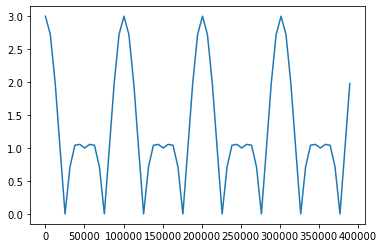

In [11]:
# test
# SEE 2019RE INSTEAD! THAT WORKS!
w = 2*sp.pi*np.arange(0, 20*sp.pi, 1)*10**3
y = []
for wVal in w:
    f = np.array([val*sp.exp(-1j*wVal*n*T) for n, val in enumerate(h_n)])
    f = abs(f.sum().evalf())
    y.append(f)
    
fix, ax = plt.subplots()
ax.plot(w, y)

In [12]:
# c.8
L = 128
deltaf = f_s/L
display(deltaf)

f117 = deltaf*117
display(f117)

k2khz = (2*10**3)/125
display(k2khz)

125.0

14625.0

16.0